In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

ruta="../../results/WHCd_Juarez_clean_v1.csv"

cdjuarezML=pd.read_csv(ruta)

cdjuarezML.head()

,tiempo_americano,time_num_usa,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,...,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,dir_viento,vel_viento
0,01/01/2000,36526,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,...,1012.635625,-1.250000e-05,0,13.064264,0.137127,0.152496,0.0,89,este,1.669412
1,01/01/2000,36526,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,...,1012.456250,-6.860000e-07,0,12.453210,0.137084,0.236725,0.0,76,este,2.006793
2,01/01/2000,36526,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,...,1012.368125,6.660000e-07,0,10.392664,0.137066,0.579987,0.0,81,este,1.787847
3,01/01/2000,36526,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,...,1012.543125,1.220000e-06,0,8.273584,0.137028,0.482239,0.0,105,este,1.486212
4,01/01/2000,36526,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,...,1012.673750,1.130000e-06,0,7.544336,0.137005,0.411499,0.0,152,sureste,1.950623


In [ ]:
cdjuarezML.info()

In [ ]:
cdjuarezML.describe()

In [ ]:
cdjuarezML.hist()

In [ ]:
cdjuarezML = cdjuarezML.drop(['tiempo_americano', 'dir_viento'], axis=1)

In [ ]:
cdjuarezML.head()

In [ ]:
cdjuarezML.isna().sum()

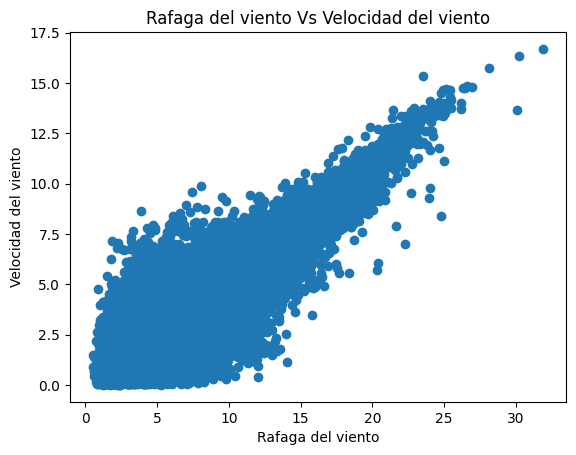

In [75]:
plt.scatter(x=cdjuarezML['rafaga_viento'], y =cdjuarezML['vel_viento'])
plt.title('Rafaga del viento Vs Velocidad del viento')
plt.xlabel('Rafaga del viento')
plt.ylabel('Velocidad del viento')
plt.show()

# Comenzando aprendizaje

In [ ]:
datos_entrenamiento = cdjuarezML.sample(frac=0.8, random_state=0)
datos_test = cdjuarezML.drop(datos_entrenamiento.index)

datos_entrenamiento

In [ ]:
etiquetas_entranamiento=datos_entrenamiento.pop('temp_del_suelo')
etiquetas_test=datos_test.pop('temp_del_suelo')

etiquetas_entranamiento

In [ ]:
datos_entrenamiento

In [ ]:
'''cdjuarezML['fecha'] = pd.to_datetime(cdjuarezML['fecha'])
cdjuarezML['fecha_num'] = (
    cdjuarezML['fecha']-cdjuarezML['fecha'].min())/np.timedelta64(1, 'D')
cdjuarezML.drop('fecha', axis=1, inplace=True)
cdjuarezML.head(10)'''

In [ ]:
modelo=LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entranamiento)

In [ ]:
predicciones=modelo.predict(datos_test)
predicciones

In [ ]:
error=np.sqrt(mean_squared_error(etiquetas_test,predicciones))
print("Error porcentual: %f" % (error*100))

In [ ]:
temp_suelo=pd.DataFrame(np.array([[]]))